# Генерация данных для РГР по статистической обработке данных

In [1]:
from scipy import mean, std
from scipy.stats import norm, chisquare, chi2, t, f, pearsonr
from matplotlib.pyplot import *
import seaborn as sb
from math import *
from random import gauss, random, randint, choice
import sys

import pandas as pd
from IPython.display import display, HTML

# показывать графики в яйчейке вывода, а не в отдельном окне
%matplotlib inline  



In [2]:
# Данные для примера

X = [4.4, 4.1, 5.1, 4.8, 4.9, 5.1, 4.7, 4.1, 6.7, 3.3, 5.3, 5.7, 3.0, 2.3, 4.7, 6.1, 3.9, 3.3, 5.1, 4.4, 4.3, 5.9, 5.2, 4.0, 4.9, 4.8, 3.6, 4.6, 4.5, 5.3, 2.3, 2.5, 3.8, 5.0, 4.0, 5.5, 3.2, 4.3, 2.5, 3.5, 3.5, 3.9, 4.1, 4.3, 4.3, 5.0, 3.8, 6.1, 4.6, 4.6, 4.3, 5.9, 5.2, 7.2, 4.3, 3.4, 5.1, 4.4, 6.3, 3.9, 4.5, 3.6, 2.8, 5.5, 5.3, 4.8, 3.7, 4.2, 4.8, 5.5, 3.9, 5.2, 4.6, 4.0, 4.3, 3.9, 4.6, 4.6, 6.2, 3.3, 3.9, 4.1, 3.9, 4.7, 6.5, 4.9, 4.9, 7.2, 5.8, 4.7, 4.9, 5.7, 4.9, 4.0, 3.7, 3.8, 4.2, 4.3, 5.0, 3.4]
Y = [10.1, 10.7, 7.1, 7.8, 10.7, 9.5, 11.9, 13.9, 9.1, 8.0, 9.6, 9.7, 5.5, 3.9, 13.1, 6.9, 10.1, 3.9, 8.3, 4.9, 11.4, 10.9, 10.1, 6.7, 10.8, 7.7, 5.7, 9.1, 9.3, 7.0, 7.1, 13.0, 13.5, 11.1, 10.4, 10.6, 11.2, 9.0, 2.8, 10.4, 11.4, 12.8, 9.8, 11.7, 11.3, 11.5, 10.7, 7.9, 14.2, 12.4, 8.4, 10.7, 11.9, 9.1, 11.6, 13.3, 3.3, 10.6, 5.6, 8.0, 13.9, 6.2, 10.7, 8.0, 14.1, 12.2, 10.1, 8.5, 10.9, 11.9, 4.5, 9.8, 6.1, 12.1, 14.4, 7.4, 8.4, 12.1, 5.5, 9.4, 10.0, 13.1, 10.4, 12.6, 11.0, 10.9, 7.6, 11.4, 9.5, 10.3, 7.1, 8.3, 9.3, 9.9, 16.8, 7.3, 9.5, 12.3, 6.3, 12.0]
# X = [gauss(0,1) for i in range(0,1000)]
XY = pd.DataFrame({'X': X, 'Y': Y})
alpha = 0.01
N = len(X)
Ny = len(Y)

In [2]:
# функции определяющие и выводящие на экран числовые характеристики

def describe(X, alpha):
    m = mean(X)
    sd = std(X, ddof=1)
    delta = t.isf(alpha, len(X)-2)* sd / sqrt(len(X))
    _x_ = m - delta, m + delta
    return m, sd, _x_


def describe2(X,Y, alpha=0.01, show=False):
    n,m = len(X), len(Y)
    mx, sdx, _x_ = describe(X, alpha)
    my, sdy, _y_ = describe(Y, alpha)
    fn = max(sdx, sdy)/min(sdx, sdy)
    fk = f.isf(alpha/2, n-1, m-1)
    tk = t.isf(alpha/2, len(X)+len(Y)-2)
    tn = (mx - my) / sqrt( (sdx**2 * (n-1) + sdy**2 * (m-1)) ) * sqrt( (n*m* (n+m-2))/(n+m) )
    r,p = pearsonr(X,Y)
    if show:
        print("           X       Y")
        print("Средние: {0:3.2f}    {1:3.2f}".format(mx,my))
        print("ст.откл: {0:3.2f}    {1:3.2f}".format(sdx,sdy))
        print("{2:.0f}-процентный доверительный интервал X: ( {0:3.2f}, {1:3.2f} )".format(_x_[0], _x_[1], 100-alpha*100))
        print("{2:.0f}-процентный доверительный интервал Y: ( {0:3.2f}, {1:3.2f} )".format(_y_[0], _y_[1], 100-alpha*100))
        print("Гипотеза о равенстве дисперсий: "+("принимается" if -fk <= fn <= fk else "отклоняется") + 
              " ( fn = {0:3.2f}; fk = ±{1:3.2f} )".format(fn, fk))
        print("Гипотеза о равенстве средних: " + ("принимается" if -tk <= tn <= tk else "отклоняется") + 
              " ( tn = {0:3.2f}; tk = ±{1:3.2f} )".format(tn, tk))
        print("Коэффициент корреляции Пирсона r = {0:.2f} ".format(r) + ("значим" if (p<alpha) else "не значим") 
              + " (p-value = {0:.6}).".format(p))
    return tk,tn,-tk <= tn <= tk, r,p
    
# вычислим числовые характеристики
Mx = mean(X)
sd = std(X, ddof=1)
mu3 = mean(list(map(lambda x: ((x-Mx)/sd)**3, X)))
Sk = mu3/sd**3  # коэффициент ассиметрии
mu4 = mean( list(map(lambda x: (x-Mx)**4, X)))
Ku = mu4/sd**4 - 3
print("Объём выборки: %i"% len(X))
print("Числовые характеристики:")
print("Mean: %2.3f"%Mx)
print("std : %2.3f"%sd)
print("mu3: %2.3f"%mu3)
print("mu4: %2.3f"%mu4)
print("Skewness: %2.3f"%Sk)
print("Kurtosis: %2.3f"%Ku)
print("Max: %2.3f" % max(X))
print("Min: %2.3f" % min(X))


describe2(X,Y, alpha, True)

NameError: name 'X' is not defined

h: 0.30


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
intervals,2.1497,2.4503,2.7510,3.0516,3.3523,3.6529,3.9535,4.2542,4.5548,4.8555,5.1561,5.4568,5.7574,6.0580,6.3587,6.6593,6.9600,7.2606
Z-intervals,-2.4203,-2.1142,-1.8081,-1.5020,-1.1960,-0.8899,-0.5838,-0.2777,0.0283,0.3344,0.6405,0.9466,1.2526,1.5587,1.8648,2.1709,2.4769,2.7830
Pi,NaN,0.0095,0.0180,0.0312,0.0493,0.0709,0.0929,0.1109,0.1207,0.1197,0.1081,0.0890,0.0668,0.0456,0.0284,0.0161,0.0083,0.0039
freq,NaN,2.0000,2.0000,2.0000,4.0000,6.0000,12.0000,10.0000,13.0000,14.0000,13.0000,6.0000,5.0000,3.0000,4.0000,1.0000,1.0000,2.0000
freq_t,NaN,0.9495,1.8044,3.1249,4.9311,7.0907,9.2910,11.0933,12.0697,11.9663,10.8107,8.8998,6.6763,4.5637,2.8427,1.6135,0.8345,0.3933


рассмотрим нулевую гипотезу  H0: генеральная совокупность имеет нормальное распределениес уровнем значимости alpha = 0.0100
Значение параметра Хи-квадрат: 12.89
значение p-value без учёта числа параметров (2) исходного распределения (нормального). 
Числой степеней свободы 18 - 1 = 17, где 18 - число участков
chi2, p-value: 12.89, 0.6806,


NameError: name 'chisqprob' is not defined

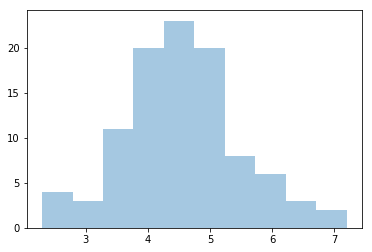

In [4]:
# Зададим уровень значимости alpha - вероятность отклонить верную гипотезу
alpha = 0.01
# построим интервальный ряд
# вычислим шаг для интервала
h = ( max(X) - min(X) ) / (1 + 3.322 * log(len(X)))
# опеределим левую границу первого интервала
_x = min(X) - h/2
print("h: %3.2f"%h)
# определим интервалы
Xint = [_x]
while (Xint[-1] < max(X)): 
    Xint += [Xint[-1]+h]
    
XInt = [(_x,x_) for _x,x_ in zip(Xint[:-1],Xint[1:])]

# Составим таблицу частот
Ni = []
for xi in Xint[1:]:
    Ni +=[0]
    for x in X:
        if xi-h < x <= xi: Ni[-1]+=1
Zint = list(map(lambda x: (x-Mx)/sd, Xint))
Pi = [norm.cdf(z_ if z_ >= min(Zint) else -10) - norm.cdf(_z if _z <= max(Zint) else 10) for _z,z_ in zip(Zint[:-1],Zint[1:])]
Ni_t = list(map(lambda x: x*N, Pi))
# chi2_ = sum( (ni - pi * len(Pi))**2 / (len(Pi)*pi) for ni,pi in zip(Ni,Pi))
# добавим [None] ибо значений ниже границы первого интервала нет, поэтому строка пустая
data = pd.DataFrame({'intervals': Xint, 'Z-intervals': Zint, 'freq': [None]+Ni, 'freq_t': [None]+Ni_t, 'Pi':[None]+Pi })
pd.set_option('precision',4)
display(data[['intervals', 'Z-intervals', 'Pi', 'freq', 'freq_t']].transpose())
s = len(data.freq)
sb.distplot(X, kde = False)
# show()

# Проверим значения критерия хи-квадрат при разном числе интервалов. Существует рекомендация, 
# объединять интервалы так чтобы в них было как минимум по 10 значений
print("рассмотрим нулевую гипотезу  H0: генеральная совокупность имеет нормальное распределение" \
"с уровнем значимости alpha = %2.4f" % alpha)
chi2_ = sum( (fe-ft)**2/ft for fe, ft in zip(data.freq[1:], data.freq_t[1:]))
chi2_c = chi2.isf(q=alpha,df=s-3)  # критическое значение параметра хи-квадрат. (максимальное отклонение для заданного alpha)
print("Значение параметра Хи-квадрат: %2.2f" % chi2_)
pval = chisquare(data.freq[1:], data.freq_t[1:])
print("""значение p-value без учёта числа параметров (2) исходного распределения (нормального). 
Числой степеней свободы %i - 1 = %i, где %i - число участков""" % (s,s-1,s) )
print("chi2, p-value: %2.2f, %2.4f," % pval)
pval = chisqprob(chi2_, len(data.freq[1:])  - 2 - 1)
print("p-value (вычисленное для степеней свободы %i - 1 - 2 = %i): %2.4f" % (s,s-3,pval))
print("Критическое значение chi2 для принятого уровня значимости (определено по таблице для df=%i, alpha=0.01): %2.3f" \
      % (s-3, chi2_c))
r = chi2_ < chi2_c
print("Наблюдаемое значение chi2 = %2.3f " % chi2_ + ("меньше" if r else "больше") + \
      " кртитичекого %2.3f - нулевая гипотеза "%chi2_c+("ПРИНИМАЕТСЯ" if r else "ОТКЛОНЯЕТСЯ"))
# Проверить гипотезу можно ещё и сравнив вычисленное p-value и уровень значимости alpha 
# (из которого как раз и определяется критическое значение chi2)
# Если полуенное p-value < alpha то нулевая гипотеза отклоняется.

sb.jointplot(x='X',y='Y', data=XY)

show()


Генерируется выборка из нормального распределения с mu = 8.4, 13.8; sigma = 2.8
вариант 1     ----------------------------------------
           X       Y
Средние: 8.37    13.47
ст.откл: 2.88    3.12
95-процентный доверительный интервал X: ( 7.89, 8.85 )
95-процентный доверительный интервал Y: ( 12.95, 13.99 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.08; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -12.02; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.18 не значим (p-value = 0.0796093).


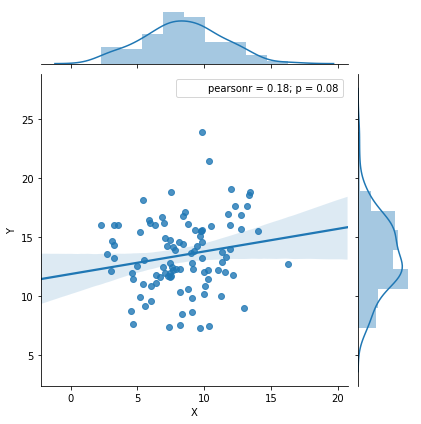

Генерируется выборка из нормального распределения с mu = 7.8, 10.1; sigma = 4.0
вариант 2     ----------------------------------------
           X       Y
Средние: 7.62    10.15
ст.откл: 4.13    3.82
95-процентный доверительный интервал X: ( 6.93, 8.30 )
95-процентный доверительный интервал Y: ( 9.52, 10.79 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.08; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -4.50; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.20 значим (p-value = 0.045292).


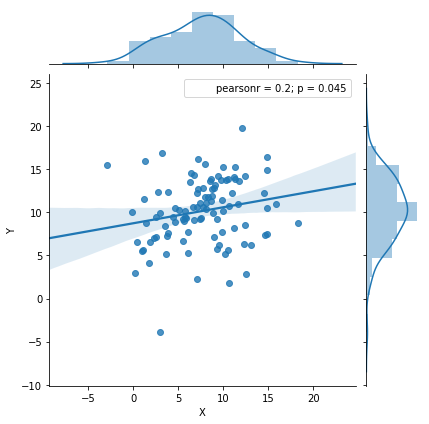

Генерируется выборка из нормального распределения с mu = 7.5, 7.1; sigma = 5.5
вариант 3     ----------------------------------------
           X       Y
Средние: 6.48    6.72
ст.откл: 5.33    5.56
95-процентный доверительный интервал X: ( 5.60, 7.37 )
95-процентный доверительный интервал Y: ( 5.80, 7.65 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.04; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -0.31; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.07 не значим (p-value = 0.504791).


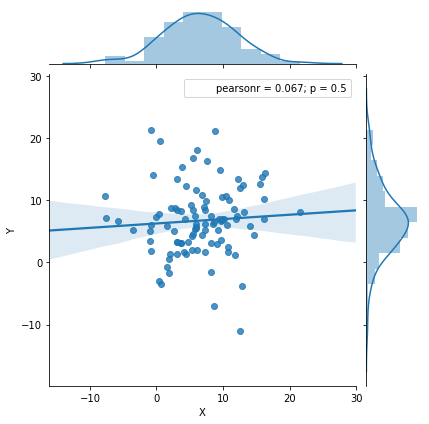

Генерируется выборка из нормального распределения с mu = 14.6, 6.9; sigma = 3.5
вариант 4     ----------------------------------------
           X       Y
Средние: 15.12    6.19
ст.откл: 3.42    3.23
95-процентный доверительный интервал X: ( 14.55, 15.69 )
95-процентный доверительный интервал Y: ( 5.66, 6.73 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.06; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 18.98; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.25 значим (p-value = 0.0136266).


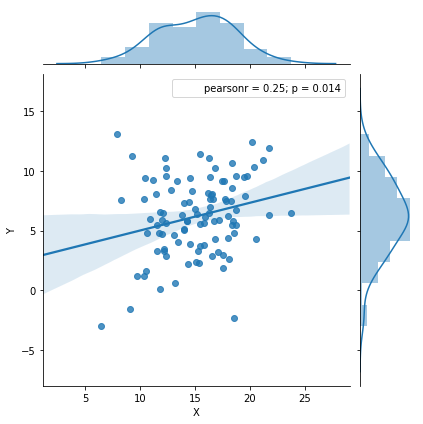

Генерируется выборка из нормального распределения с mu = 15.6, 15.4; sigma = 1.9
вариант 5     ----------------------------------------
           X       Y
Средние: 15.56    15.33
ст.откл: 2.00    2.07
95-процентный доверительный интервал X: ( 15.23, 15.90 )
95-процентный доверительный интервал Y: ( 14.99, 15.67 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = 0.81; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.05 не значим (p-value = 0.647208).


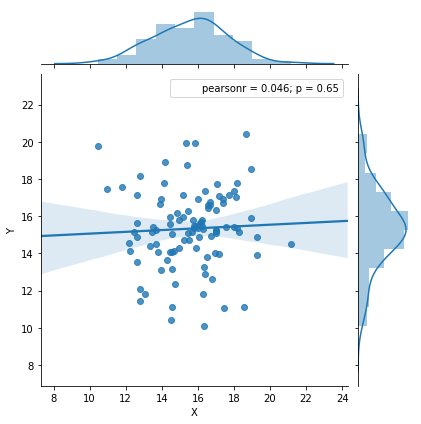

Генерируется выборка из нормального распределения с mu = 7.9, 8.8; sigma = 2.9
вариант 6     ----------------------------------------
           X       Y
Средние: 7.77    8.36
ст.откл: 2.96    2.89
95-процентный доверительный интервал X: ( 7.28, 8.26 )
95-процентный доверительный интервал Y: ( 7.88, 8.84 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.02; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -1.42; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.20 значим (p-value = 0.0437561).


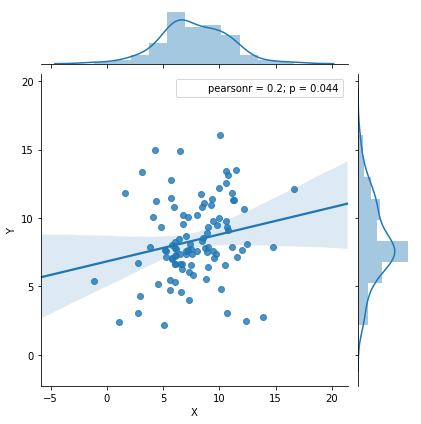

Генерируется выборка из нормального распределения с mu = 15.3, 15.7; sigma = 5.2
вариант 7     ----------------------------------------
           X       Y
Средние: 15.63    14.51
ст.откл: 5.21    5.66
95-процентный доверительный интервал X: ( 14.76, 16.49 )
95-процентный доверительный интервал Y: ( 13.57, 15.45 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.09; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = 1.45; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.28 значим (p-value = 0.0053103).


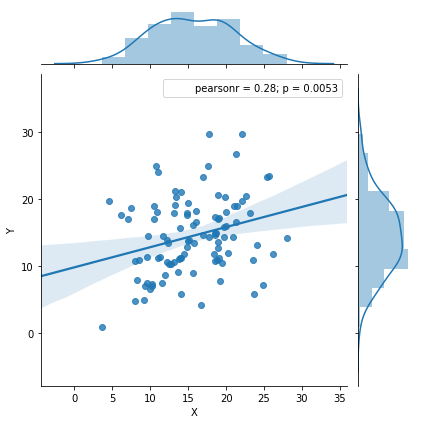

Генерируется выборка из нормального распределения с mu = 7.9, 11.5; sigma = 1.4
вариант 8     ----------------------------------------
           X       Y
Средние: 7.97    11.26
ст.откл: 1.21    1.36
95-процентный доверительный интервал X: ( 7.76, 8.17 )
95-процентный доверительный интервал Y: ( 11.03, 11.48 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.12; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -18.08; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.03 не значим (p-value = 0.751617).


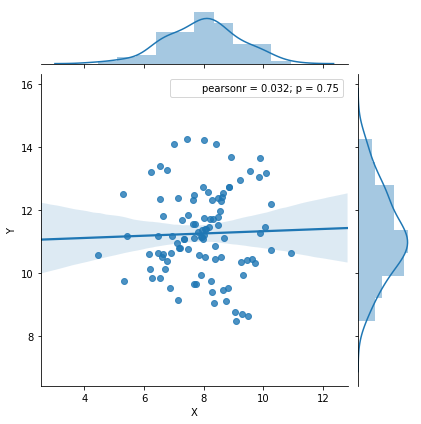

Генерируется выборка из нормального распределения с mu = 15.3, 7.7; sigma = 5.4
вариант 9     ----------------------------------------
           X       Y
Средние: 15.40    7.95
ст.откл: 5.31    5.00
95-процентный доверительный интервал X: ( 14.52, 16.28 )
95-процентный доверительный интервал Y: ( 7.12, 8.78 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.06; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 10.21; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.11 не значим (p-value = 0.281967).


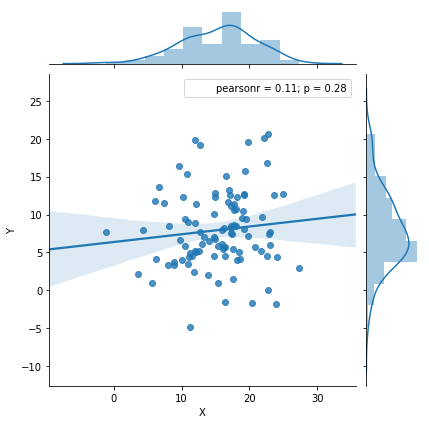

Генерируется выборка из нормального распределения с mu = 13.2, 13.2; sigma = 2.0
вариант 10     ----------------------------------------
           X       Y
Средние: 13.16    13.23
ст.откл: 1.84    2.08
95-процентный доверительный интервал X: ( 12.85, 13.46 )
95-процентный доверительный интервал Y: ( 12.89, 13.58 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.13; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -0.28; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.09 не значим (p-value = 0.358905).


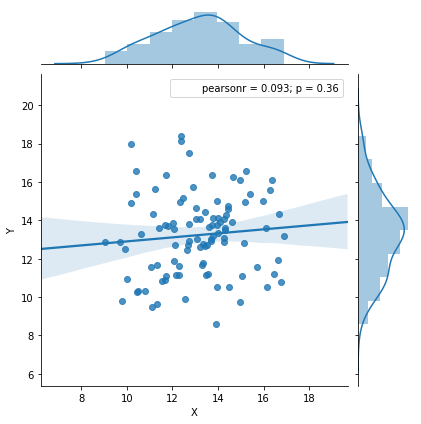

Генерируется выборка из нормального распределения с mu = 6.9, 10.6; sigma = 1.2
вариант 11     ----------------------------------------
           X       Y
Средние: 6.85    10.73
ст.откл: 1.21    1.09
95-процентный доверительный интервал X: ( 6.65, 7.05 )
95-процентный доверительный интервал Y: ( 10.54, 10.91 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.11; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -23.83; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.23 значим (p-value = 0.0191948).


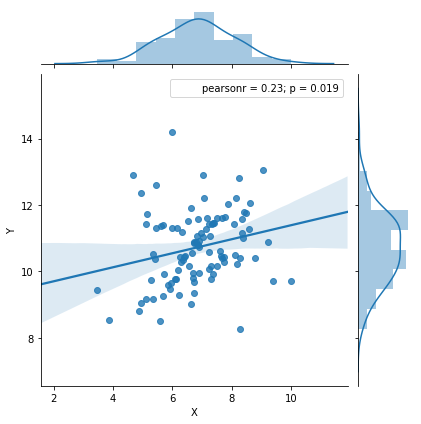

Генерируется выборка из нормального распределения с mu = 10.7, 7.3; sigma = 2.3
вариант 12     ----------------------------------------
           X       Y
Средние: 11.11    7.22
ст.откл: 2.50    2.22
95-процентный доверительный интервал X: ( 10.69, 11.52 )
95-процентный доверительный интервал Y: ( 6.85, 7.59 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.13; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 11.60; tk = ±1.97 )
Коэффициент корреляции Пирсона r = -0.01 не значим (p-value = 0.89964).


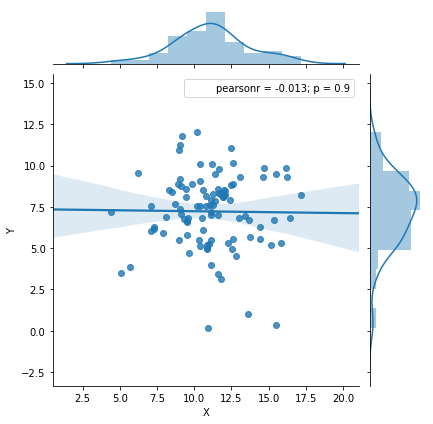

Генерируется выборка из нормального распределения с mu = 10.4, 6.8; sigma = 5.6
вариант 13     ----------------------------------------
           X       Y
Средние: 10.39    7.38
ст.откл: 5.48    6.00
95-процентный доверительный интервал X: ( 9.48, 11.30 )
95-процентный доверительный интервал Y: ( 6.39, 8.38 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.09; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 3.71; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.28 значим (p-value = 0.00433409).


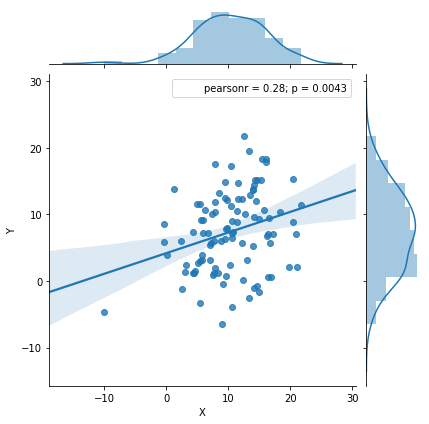

Генерируется выборка из нормального распределения с mu = 15.0, 11.6; sigma = 3.0
вариант 14     ----------------------------------------
           X       Y
Средние: 14.98    11.42
ст.откл: 2.88    2.84
95-процентный доверительный интервал X: ( 14.50, 15.45 )
95-процентный доверительный интервал Y: ( 10.95, 11.90 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 8.79; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.15 не значим (p-value = 0.133602).


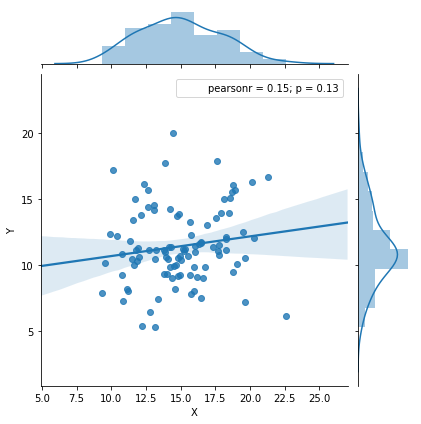

Генерируется выборка из нормального распределения с mu = 7.0, 8.1; sigma = 3.5
вариант 15     ----------------------------------------
           X       Y
Средние: 6.31    7.44
ст.откл: 3.86    3.79
95-процентный доверительный интервал X: ( 5.67, 6.95 )
95-процентный доверительный интервал Y: ( 6.81, 8.07 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.02; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -2.09; tk = ±1.97 )
Коэффициент корреляции Пирсона r = -0.05 не значим (p-value = 0.604966).


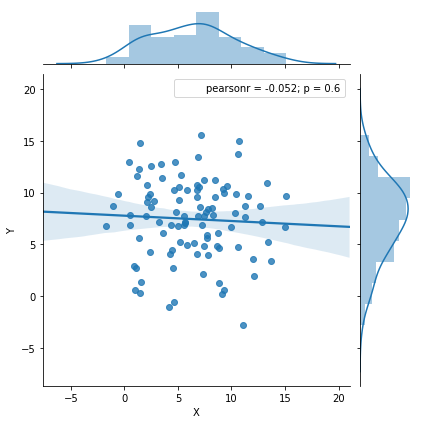

Генерируется выборка из нормального распределения с mu = 6.1, 7.7; sigma = 5.8
вариант 16     ----------------------------------------
           X       Y
Средние: 6.52    7.62
ст.откл: 6.66    5.55
95-процентный доверительный интервал X: ( 5.42, 7.63 )
95-процентный доверительный интервал Y: ( 6.70, 8.55 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.20; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -1.27; tk = ±1.97 )
Коэффициент корреляции Пирсона r = -0.02 не значим (p-value = 0.832207).


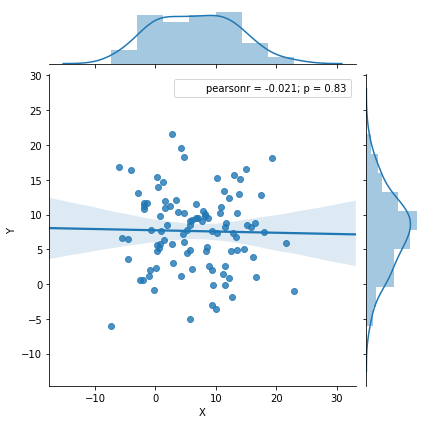

Генерируется выборка из нормального распределения с mu = 6.6, 8.1; sigma = 1.5
вариант 17     ----------------------------------------
           X       Y
Средние: 6.59    8.22
ст.откл: 1.39    1.56
95-процентный доверительный интервал X: ( 6.36, 6.83 )
95-процентный доверительный интервал Y: ( 7.96, 8.48 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.12; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -7.79; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.28 значим (p-value = 0.00425145).


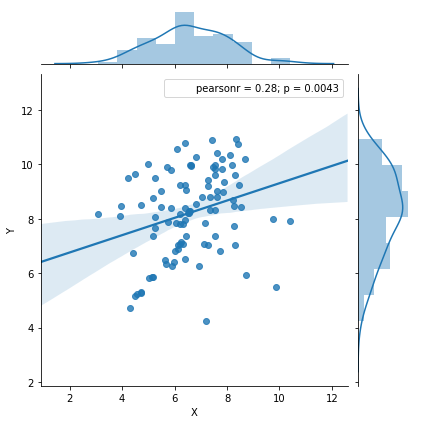

Генерируется выборка из нормального распределения с mu = 14.2, 9.4; sigma = 4.3
вариант 18     ----------------------------------------
           X       Y
Средние: 14.15    8.61
ст.откл: 3.95    4.43
95-процентный доверительный интервал X: ( 13.49, 14.80 )
95-процентный доверительный интервал Y: ( 7.87, 9.34 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.12; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 9.34; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.26 значим (p-value = 0.00792314).


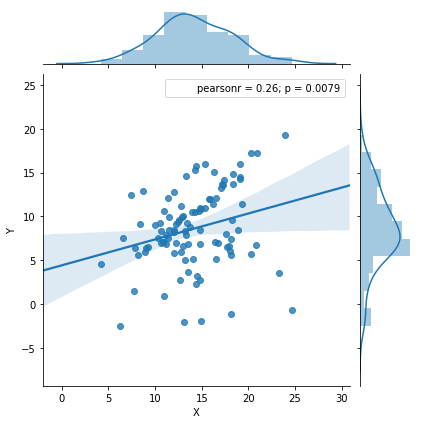

Генерируется выборка из нормального распределения с mu = 7.6, 14.1; sigma = 4.5
вариант 19     ----------------------------------------
           X       Y
Средние: 7.61    14.23
ст.откл: 4.66    5.21
95-процентный доверительный интервал X: ( 6.84, 8.38 )
95-процентный доверительный интервал Y: ( 13.36, 15.09 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.12; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -9.47; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.15 не значим (p-value = 0.14031).


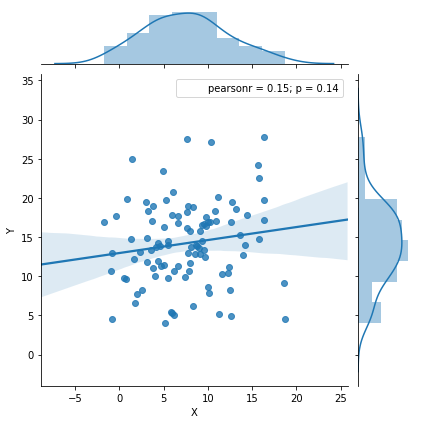

Генерируется выборка из нормального распределения с mu = 11.6, 10.9; sigma = 5.3
вариант 20     ----------------------------------------
           X       Y
Средние: 12.48    10.86
ст.откл: 5.10    5.23
95-процентный доверительный интервал X: ( 11.63, 13.33 )
95-процентный доверительный интервал Y: ( 9.99, 11.73 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 2.21; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.29 значим (p-value = 0.00335927).


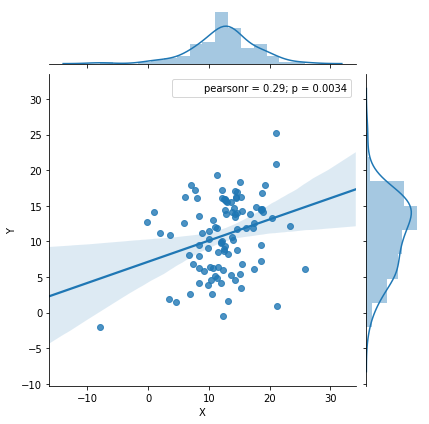

Генерируется выборка из нормального распределения с mu = 11.9, 13.3; sigma = 1.6
вариант 21     ----------------------------------------
           X       Y
Средние: 11.93    13.36
ст.откл: 1.78    1.65
95-процентный доверительный интервал X: ( 11.63, 12.23 )
95-процентный доверительный интервал Y: ( 13.08, 13.63 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.08; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -5.88; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.14 не значим (p-value = 0.164218).


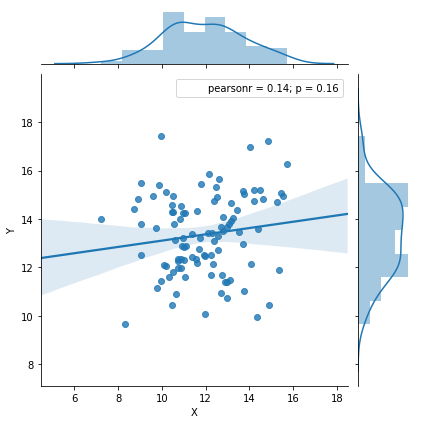

Генерируется выборка из нормального распределения с mu = 10.9, 7.3; sigma = 2.8
вариант 22     ----------------------------------------
           X       Y
Средние: 10.95    7.05
ст.откл: 2.68    3.03
95-процентный доверительный интервал X: ( 10.50, 11.39 )
95-процентный доверительный интервал Y: ( 6.55, 7.56 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.13; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 9.63; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.32 значим (p-value = 0.00116113).


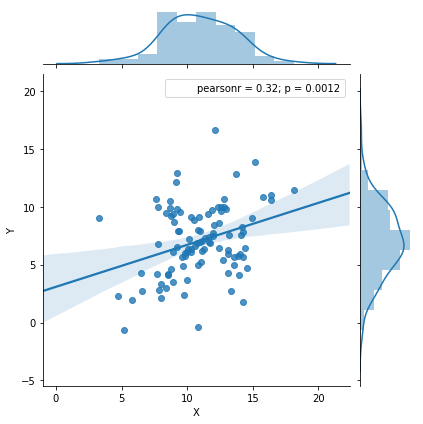

Генерируется выборка из нормального распределения с mu = 8.4, 8.6; sigma = 2.5
вариант 23     ----------------------------------------
           X       Y
Средние: 8.40    8.88
ст.откл: 2.52    2.17
95-процентный доверительный интервал X: ( 7.98, 8.82 )
95-процентный доверительный интервал Y: ( 8.52, 9.24 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.16; fk = ±1.49 )
Гипотеза о равенстве средних: принимается ( tn = -1.43; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.20 значим (p-value = 0.0492686).


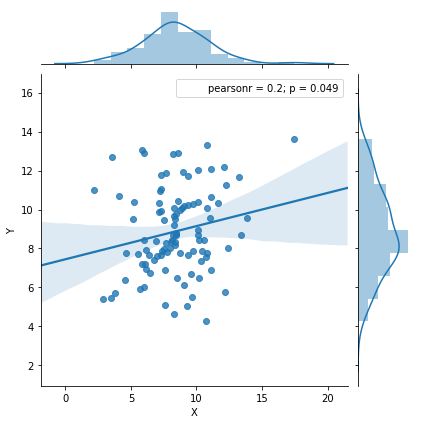

Генерируется выборка из нормального распределения с mu = 10.7, 15.1; sigma = 4.9
вариант 24     ----------------------------------------
           X       Y
Средние: 11.11    14.86
ст.откл: 4.94    4.79
95-процентный доверительный интервал X: ( 10.29, 11.93 )
95-процентный доверительный интервал Y: ( 14.07, 15.66 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.03; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -5.46; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.14 не значим (p-value = 0.16504).


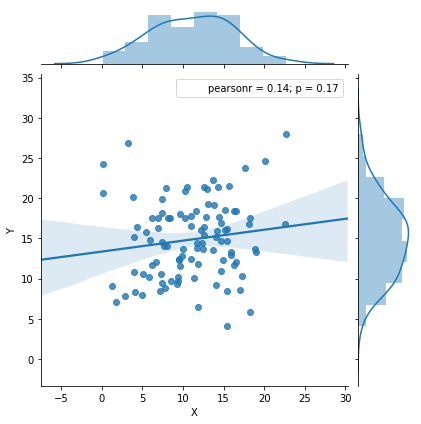

Генерируется выборка из нормального распределения с mu = 11.0, 7.5; sigma = 4.1
вариант 25     ----------------------------------------
           X       Y
Средние: 10.96    7.62
ст.откл: 3.92    4.10
95-процентный доверительный интервал X: ( 10.31, 11.61 )
95-процентный доверительный интервал Y: ( 6.94, 8.31 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.05; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 5.89; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.25 значим (p-value = 0.0120784).


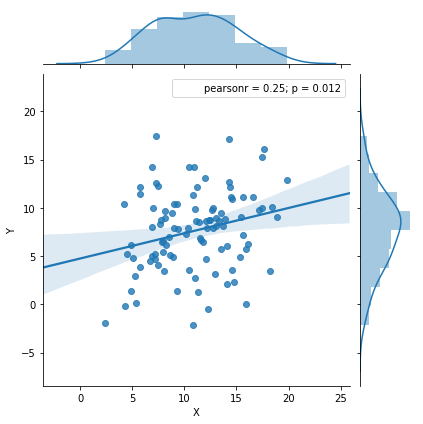

Генерируется выборка из нормального распределения с mu = 8.0, 14.3; sigma = 2.7
вариант 26     ----------------------------------------
           X       Y
Средние: 7.60    14.04
ст.откл: 2.61    2.76
95-процентный доверительный интервал X: ( 7.17, 8.04 )
95-процентный доверительный интервал Y: ( 13.59, 14.50 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.06; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -16.98; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.25 значим (p-value = 0.0111195).


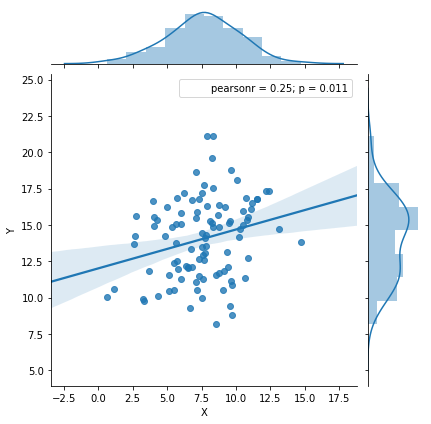

Генерируется выборка из нормального распределения с mu = 10.4, 15.3; sigma = 2.0
вариант 27     ----------------------------------------
           X       Y
Средние: 10.40    15.37
ст.откл: 1.86    1.84
95-процентный доверительный интервал X: ( 10.09, 10.71 )
95-процентный доверительный интервал Y: ( 15.06, 15.68 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.01; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -18.98; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.03 не значим (p-value = 0.738967).


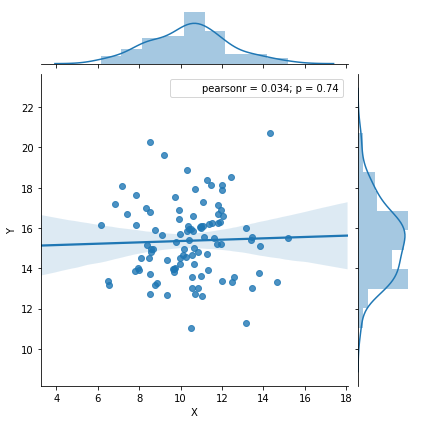

Генерируется выборка из нормального распределения с mu = 7.3, 10.4; sigma = 3.9
вариант 28     ----------------------------------------
           X       Y
Средние: 6.94    10.09
ст.откл: 4.06    3.78
95-процентный доверительный интервал X: ( 6.27, 7.62 )
95-процентный доверительный интервал Y: ( 9.46, 10.72 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.07; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = -5.67; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.07 не значим (p-value = 0.46151).


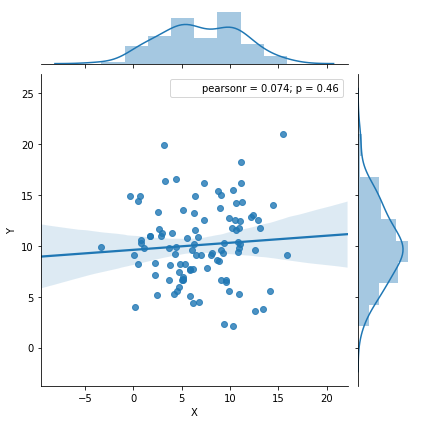

Генерируется выборка из нормального распределения с mu = 11.4, 7.9; sigma = 4.7
вариант 29     ----------------------------------------
           X       Y
Средние: 10.68    7.87
ст.откл: 5.29    4.50
95-процентный доверительный интервал X: ( 9.80, 11.55 )
95-процентный доверительный интервал Y: ( 7.12, 8.61 )
Гипотеза о равенстве дисперсий: принимается ( fn = 1.18; fk = ±1.49 )
Гипотеза о равенстве средних: отклоняется ( tn = 4.05; tk = ±1.97 )
Коэффициент корреляции Пирсона r = 0.17 не значим (p-value = 0.0899811).


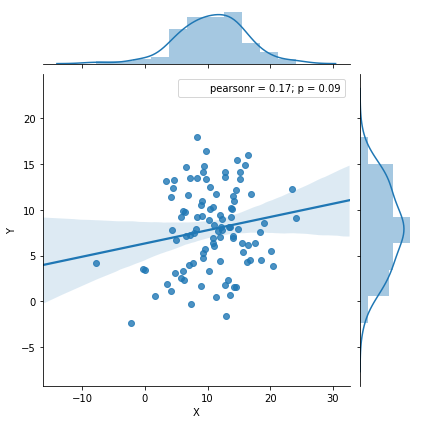

In [3]:
# генерируются данные


def partial_sort(X, p=0.5, comp = lambda x,y: x < y):
    """ p - вероятность для двух сосебних элементов быть отсортироваными
    """
    for i in range(len(X)):
        if random()<p:
            for j in range(len(X)-i-1):
                if comp(X[j], X[j+1]): 
                    X[j], X[j+1] = X[j+1], X[j]
    return X



def gen_data_func(N, func = lambda x: x, noise_k = 1):
    """ Создание двух СВ связаных зависимостью func
    """
    mu1 = round(6+random()*10,1)
    mu2 = round(6+random()*10,1)
    sigma = round(1+random()*5,1)
    print("Генерируется выборка из нормального распределения с mu = %2.1f, %2.1f; sigma = %2.1f" % 
          (mu1, mu2, sigma))
    X = [round(gauss(mu1, sigma),2) for i in range(100)]
    ynoise = int(sigma)*3
    Y = [func( x ) + randint(-ynoise, ynoise)*noise_k for x in X]
    return pd.DataFrame({'X': X, 'Y':Y})


def gen_data(N, p = 0, compy = lambda x,y: x < y):
    """ Создание двух СВ -> DataFrame(X,Y)
    p - вероятность сортировки элементов в списках
    (если элементы отсортированы, то получается лин. зависимость)
    comp - как сравнивать элементы Y при сортировке
    """
    mu1 = round(6+random()*10,1)
    mu2 = round(6+random()*10,1)
    sigma = round(1+random()*5,1)
    print("Генерируется выборка из нормального распределения с mu = %2.1f, %2.1f; sigma = %2.1f" % 
          (mu1, mu2, sigma))
    X = [round(gauss(mu1, sigma),2) for i in range(100)]
    Y = [round(gauss(mu2, sigma),2) for i in range(100)]
    data = pd.DataFrame({'X': X, 'Y':Y})
    partial_sort(data['X'], p)
    partial_sort(data['Y'], p, compy)
    return data


def print_data(d):
    X = d.X
    Y = d.Y
#     suptitle("X", size=16)
#     sb.distplot(X)
#     show()
#     suptitle("Y", size=16)
#     sb.distplot(Y)
#     show()
    describe2( d['X'], d['Y'], alpha=0.05, show = True)
    sb.jointplot(x='X', y='Y', data = d, kind='reg')
    show()
    

import os

if not os.path.isdir("task1"):
    os.mkdir("task1")
    
os.chdir('task1')
for i in range(1,30):
    data = gen_data(100, p = 0.2)
    print("вариант {}     ".format(i)+"--"*20)
    print_data(data)
    data.to_csv('СУС14-V%0.2i.csv' % (i), sep=';')
os.chdir('..')